<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

Text(0.5, 0, 'Time(min)')

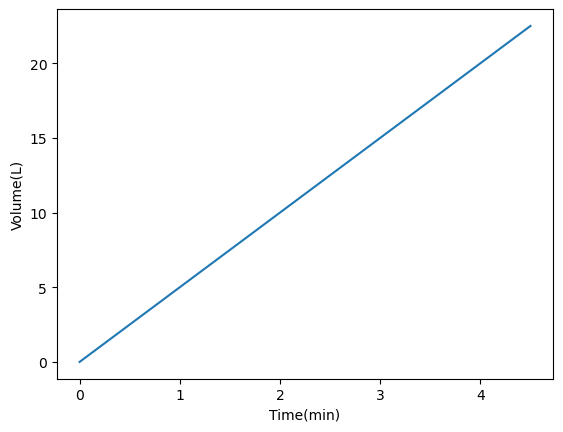

In [4]:
import numpy as np
from matplotlib import pyplot as plt
max_time = 5
dt = 0.5
rate = 5
all_volume = []
volume = 0

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    volume += dV
    
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(min)')

### 1.2 An overflowing bucket

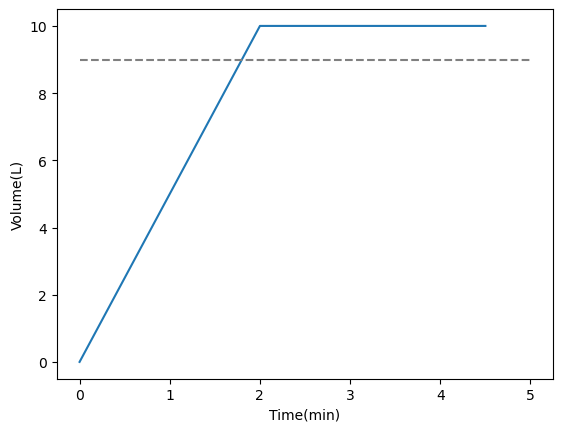

In [10]:
max_time = 5
dt = 0.5
rate = 5
bucket_capacity = 9
all_volume = []
volume = 0

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    if volume <= bucket_capacity:
        volume+= dV
    
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(min)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.3 A leaky bucket

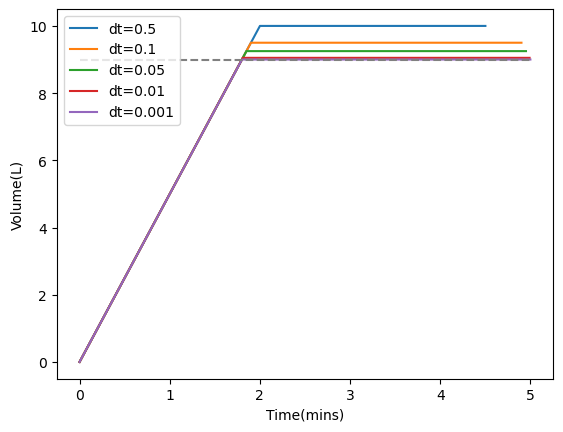

In [11]:
max_time = 5                     
dt = .5                        
rate = 5                    
bucket_capacity = 9              

for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []                  
    volume = 0                       

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV

    plt.plot(all_time, all_volume, label=f'dt={dt}')

plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()

### 1.4 Let’s turn off the tap

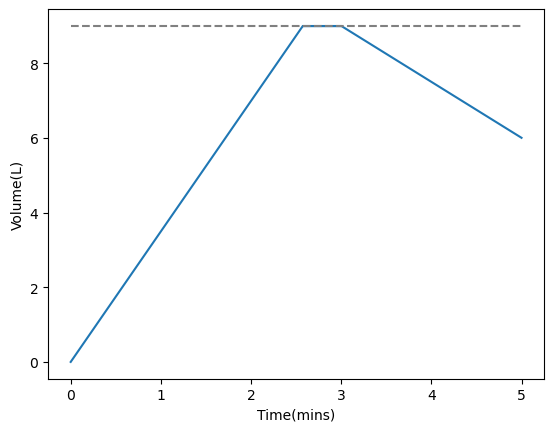

In [15]:
tap_off_time = 3
max_time = 5                     
dt = .001                        
rate = 5   
leak_rate = 1.5
bucket_capacity = 9              
all_volume = []
volume = 0

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume
        
    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### Using while

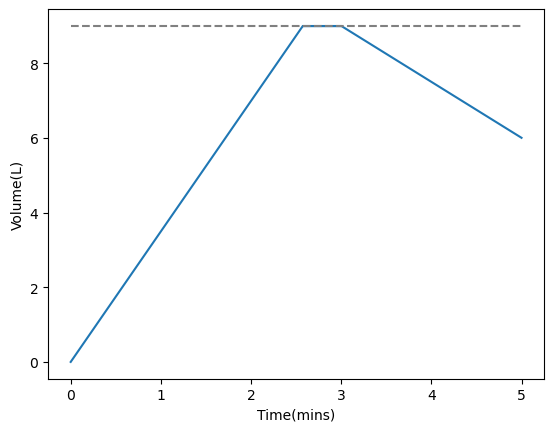

In [16]:
tap_off_time = 3                
max_time = 5                     
dt = .001                        
rate = 5                         
leak_rate = 1.5                
bucket_capacity = 9             
all_volume = []                 
all_time = []                   
volume = 0                     
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### 1.5 A quick summary

In [ ]:

# Your code here


### 1.6 We just solved a differential equation!

In [ ]:

# Your code here


## 2 Simulating Radioactivity

### 2.1 Introduction

In [ ]:

# Your code here


### 2.2 Approximating the differential equation

In [ ]:

# Your code here


### 2.3 Getting a feel

In [ ]:

# Your code here


### 2.4 Let’s write some code

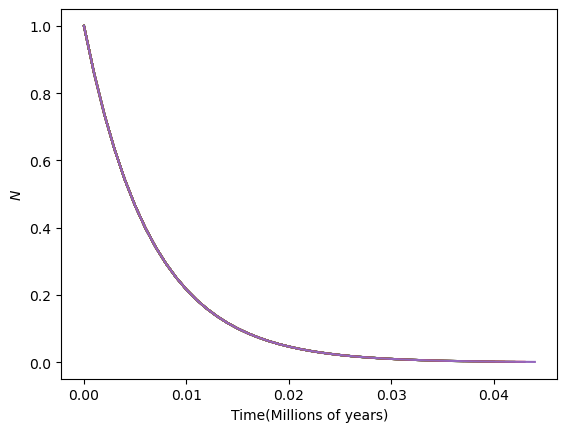

In [3]:
decay_constant = 142
stop_fraction = 1E-3

N0 = 1 
dt =0.001
time, N = 0, N0

all_N, all_time = [], []

while True:
    all_time.append(time)
    all_N.append(N)
    
    dN = -decay_constant*N*dt
    N += dN
    
    if N < N0*stop_fraction:
        break
    
    time += dt

    plt.plot(all_time, all_N)
    plt.ylabel('$N$')
    plt.xlabel('Time(Millions of years)')

### 2.5 Some things to note about the code

In [ ]:

# Your code here


### 2.6 A quick summary

In [ ]:

# Your code here


## Exercise 1 :  A more realistic leak

Text(0.5, 0, 'Time(mins)')

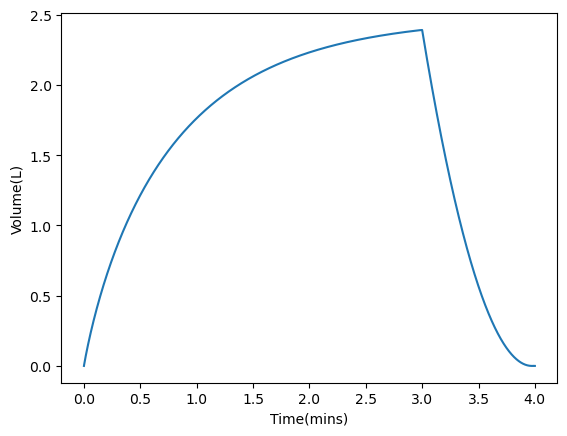

In [3]:
import math
from matplotlib import pyplot as plt
tap_off_time = 3                 
max_time = 4                     
dt = .0001                        
rate = 5                                           
bucket_capacity = 9              
all_volume = []                  
volume = 0

def leak_rate(vol):
    h = (vol/1000)/0.07
    water_speed = math.sqrt(2 * 9.8 * h * 60**2) 
    if water_speed > 0:
        leak_rate = 0.0001 * water_speed * 1000
    else:
        leak_rate = 0
    return(leak_rate)



all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    if volume == 0:
        volume += dV
    
    elif volume > 0:
        #print(leak_rate(volume))
        leak_volume = leak_rate(volume) * dt
        volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV
    
    if volume < 0:
        volume = 0
        
#     print(volume)

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
